In [50]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
from sklearn.naive_bayes import MultinomialNB

# 1. Bac or Nam

### Data

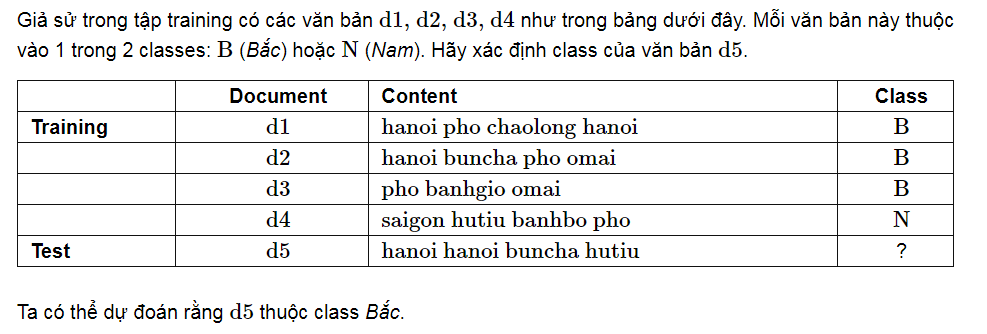

In [51]:
img = Image.open("./data/NB.PNG")
img

## Multinomial Naive Bayes

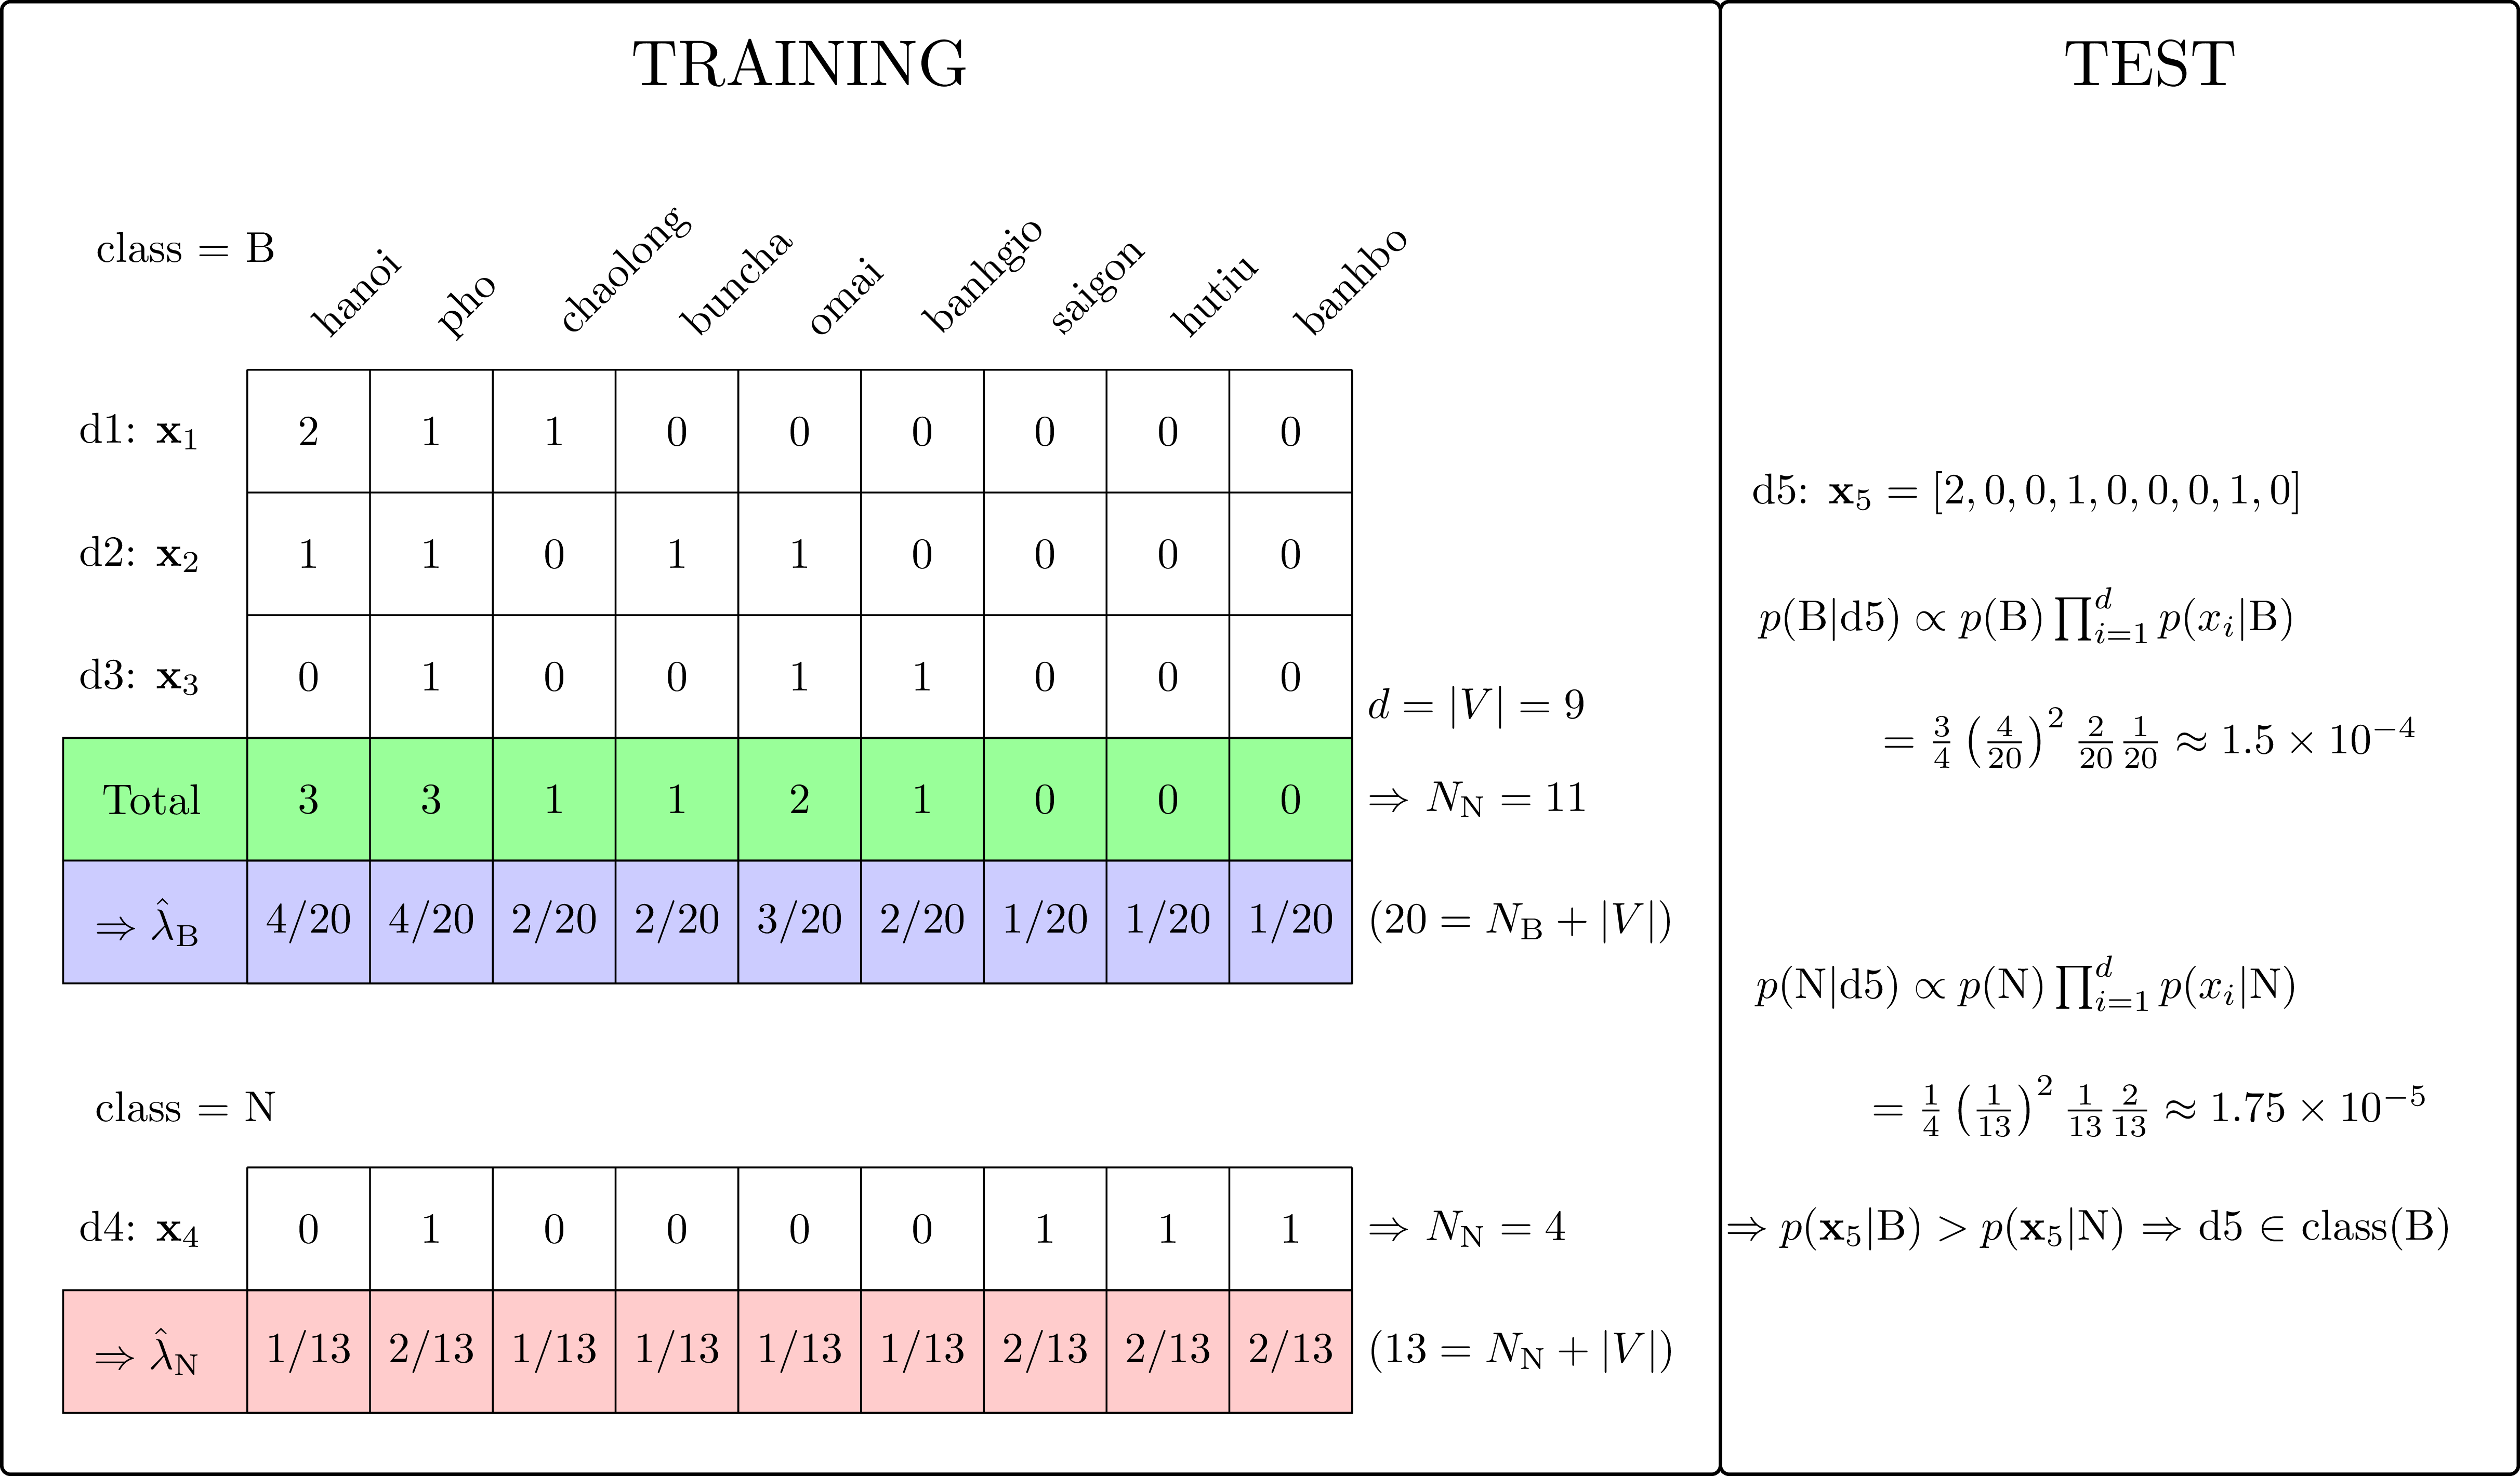

In [52]:
im = Image.open("./data/Multinomial_Naive_Bayes.png")
im

In [53]:
# train data (using Bag of Word)
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

# test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

In [54]:
# call MultinomialNB
clf = MultinomialNB()

In [55]:
# training
clf.fit(train_data, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Probability of d6 in each class: [[0.29175335 0.70824665]]


## Bernoulli Naive Bayes

In [57]:
from sklearn.naive_bayes import BernoulliNB

In [58]:
# train data (using Bag of Word)
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

In [59]:
# call MultinomialNB
clf = BernoulliNB()

In [60]:
# training
clf.fit(train_data, label)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [61]:
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Probability of d6 in each class: [[0.16948581 0.83051419]]


# 2. Spam_filtering

#### Trong ví dụ này, dữ liệu đã được xử lý, và là một tập con của cơ sở dữ liệu Ling-Spam Dataset.
### Mô tả dữ liệu:
#### Tập dữ liệu này bao gồm tổng cộng 960 emails tiếng Anh, được tách thành tập training và test theo tỉ lệ 700:260, 50% trong mỗi tập là các spam emails.
#### Dữ liệu trong cơ sở dữ liệu này đã được xử lý khá đẹp. Các quy tắc xử lý như sau:
1. Loại bỏ stop words: Những từ xuất hiện thường xuyên như ‘and’, ‘the’, ‘of’, … được loại bỏ.
2. Lemmatization: Những từ có cùng ‘gốc’ được đưa về cùng loại. Ví dụ, ‘include’, ‘includes’, ‘included’ đều được đưa chung về ‘include’. Tất cả các từ cũng đã được đưa về dạng ký tự thường (không phải HOA).
3. Loại bỏ non-words: Số, dấu câu, ký tự ‘tabs’, ký tự ‘xuống dòng’ đã được loại bỏ.

In [62]:
# packages
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.metrics import accuracy_score # for evaluating results

In [63]:
# data path and file name
path = './data/ex6DataPrepared/'

train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

In [64]:
nwords = 2500

def read_data(data_fn, label_fn):
    # read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]
    
    # read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content]
    
    dat = np.zeros((len(content), 3), dtype = int)
    
    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
        
    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)), shape=(len(label), nwords))
    return (data, label)

In [65]:
(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

In [66]:
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
     (train_data.shape[0], accuracy_score(test_label, y_pred)*100))

Training size = 700, accuracy = 98.08%


In [67]:
# Try litter data (100 data samples)
train_data_fn = 'train-features-100.txt'
train_label_fn = 'train-labels-100.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'

(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 100, accuracy = 97.69%


In [68]:
# Try litter data (100 data samples)
train_data_fn = 'train-features-50.txt'
train_label_fn = 'train-labels-50.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'


(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 97.31%


##### BernoulliNB model

In [69]:
clf = BernoulliNB(binarize = .5)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 69.62%


# 3. Tóm tắt
### * Naive Bayes Classifiers (NBC) thường được sử dụng trong các bài toán Text Classification.
### * NBC có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.
### * Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), NBC được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.